# Task 1

In [1]:
#open the dataset, ignore errors as it cant be decoded
with open(r'C:\Users\user\Desktop\NLP\reviews_data.txt',encoding="utf-8",errors="ignore") as f:
    data = f.read()

In [2]:
#Try reading only 2000 characters
data=data[0:2000]

In [3]:
#Tokenization
from nltk.tokenize import word_tokenize  
from nltk.tokenize import RegexpTokenizer
tokens = data.lower()  #convert to lowercase
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(tokens) #tokenize and remove punctuation
#sample doc1 tokenized
print(tokens[0:100])

['oct', '12', '2009', 'nice', 'trendy', 'hotel', 'location', 'not', 'too', 'bad', 'i', 'stayed', 'in', 'this', 'hotel', 'for', 'one', 'night', 'as', 'this', 'is', 'a', 'fairly', 'new', 'place', 'some', 'of', 'the', 'taxi', 'drivers', 'did', 'not', 'know', 'where', 'it', 'was', 'and', 'or', 'did', 'not', 'want', 'to', 'drive', 'there', 'once', 'i', 'have', 'eventually', 'arrived', 'at', 'the', 'hotel', 'i', 'was', 'very', 'pleasantly', 'surprised', 'with', 'the', 'decor', 'of', 'the', 'lobby', 'ground', 'floor', 'area', 'it', 'was', 'very', 'stylish', 'and', 'modern', 'i', 'found', 'the', 'reception', 's', 'staff', 'geeting', 'me', 'with', 'aloha', 'a', 'bit', 'out', 'of', 'place', 'but', 'i', 'guess', 'they', 'are', 'briefed', 'to', 'say', 'that', 'to', 'keep', 'up', 'the']


In [4]:
#Remove stopwords,lemmatize
from nltk.corpus import stopwords
import re, string
def preprocess(list):
    l=[]
    for word in list:
        if word not in set(stopwords.words("english")) and len(word)>2:
            lem = WordNetLemmatizer()
            word=lem.lemmatize(word)
            word=re.sub(r"\d+","",word)
            word=word.strip()
            l.append(word)
        else:
            pass
    return l

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
clean= preprocess(tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
#sample of preprocessed data
print(clean[0:100])

['oct', '', 'nice', 'trendy', 'hotel', 'location', 'bad', 'stayed', 'hotel', 'one', 'night', 'fairly', 'new', 'place', 'taxi', 'driver', 'know', 'want', 'drive', 'eventually', 'arrived', 'hotel', 'pleasantly', 'surprised', 'decor', 'lobby', 'ground', 'floor', 'area', 'stylish', 'modern', 'found', 'reception', 'staff', 'geeting', 'aloha', 'bit', 'place', 'guess', 'briefed', 'say', 'keep', 'coroporate', 'image', 'starwood', 'preferred', 'guest', 'member', 'given', 'small', 'gift', 'upon', 'check', 'couple', 'fridge', 'magnet', 'gift', 'box', 'nevertheless', 'nice', 'gesture', 'room', 'nice', 'roomy', 'tea', 'coffee', 'facility', 'room', 'get', 'two', 'complimentary', 'bottle', 'water', 'plus', 'toiletry', 'bliss', 'location', 'great', 'last', 'metro', 'stop', 'need', 'take', 'taxi', 'planning', 'going', 'see', 'historic', 'site', 'beijing', 'chose', 'breakfast', 'hotel', 'really', 'tasty', 'good', 'selection', 'dish', 'couple', 'computer']


In [7]:
#Create word2vec model
import gensim
import multiprocessing
from gensim import models
from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab([clean], progress_per=10000)
w2v_model.train([clean], total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

#Find similar words
w2v_model.most_similar(positive=["one","gift"], negative=["two"],topn=5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('eventually', 0.15117084980010986),
 ('store', 0.13391751050949097),
 ('staff', 0.12515752017498016),
 ('breakfast', 0.11340277642011642),
 ('recent', 0.09587140381336212)]

# Task 2

## K-means

In [20]:
from nltk.cluster import KMeansClusterer
import nltk
input = w2v_model.wv[w2v_model.wv.vocab]
NUM_CLUSTERS=100
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(input, assign_clusters=True)

In [30]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(input)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(input))
 
silhouette_score = metrics.silhouette_score(input, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[87 48 16  4  8 15  6  3  2 68 64 14 61 38 23 12  1 65 33 59 24 59 55 64
 26  7  4 67 95 37 42 80 76 70 55 56 92  0 25 13 89 19 97 71  9  8 28 59
 20 85 15  3 30 20 81 21 21 85  9 44 12 86 23 13 40 75 50 49 91 45 53 54
 17 35  3 22 18  5 84 55 69 63 54  3 90 58 50 93 51 52 21  1 64 79 46 66
  9 40  4 37 39 28 22 57  1 18 27 24 37 14 31 60 89 62 17 32 94 78 29 83
 41 36 98  4 23 34 72 65 25 88 10 74 77 73 21 65 47 28 12 82 96 43  7 12
 99 11]
Centroids data
[[-1.0311955e-03 -9.2596642e-04 -2.4532375e-04 ...  4.8300470e-04
  -3.2416979e-04 -7.5922871e-04]
 [-6.0928595e-04 -5.9813145e-04 -2.3605450e-04 ...  1.1201533e-03
   1.7116001e-04  2.5917616e-04]
 [-1.1785471e-04 -1.6723725e-04  8.0541795e-06 ... -6.2038098e-04
   1.1530501e-03 -8.7310030e-04]
 ...
 [ 8.3821028e-04 -2.1763990e-05  2.8286141e-04 ...  1.3039298e-03
  -1.2739573e-03 -4.4771144e-04]
 [ 2.7400901e-04 -1.3261924e-03 -1.2606913e-03 ...  1.3567494e-03
   7.5041206e-04  1.5963963e-03]
 [ 

## Heirachy Agglomerative Clustering

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  after removing the cwd from sys.path.


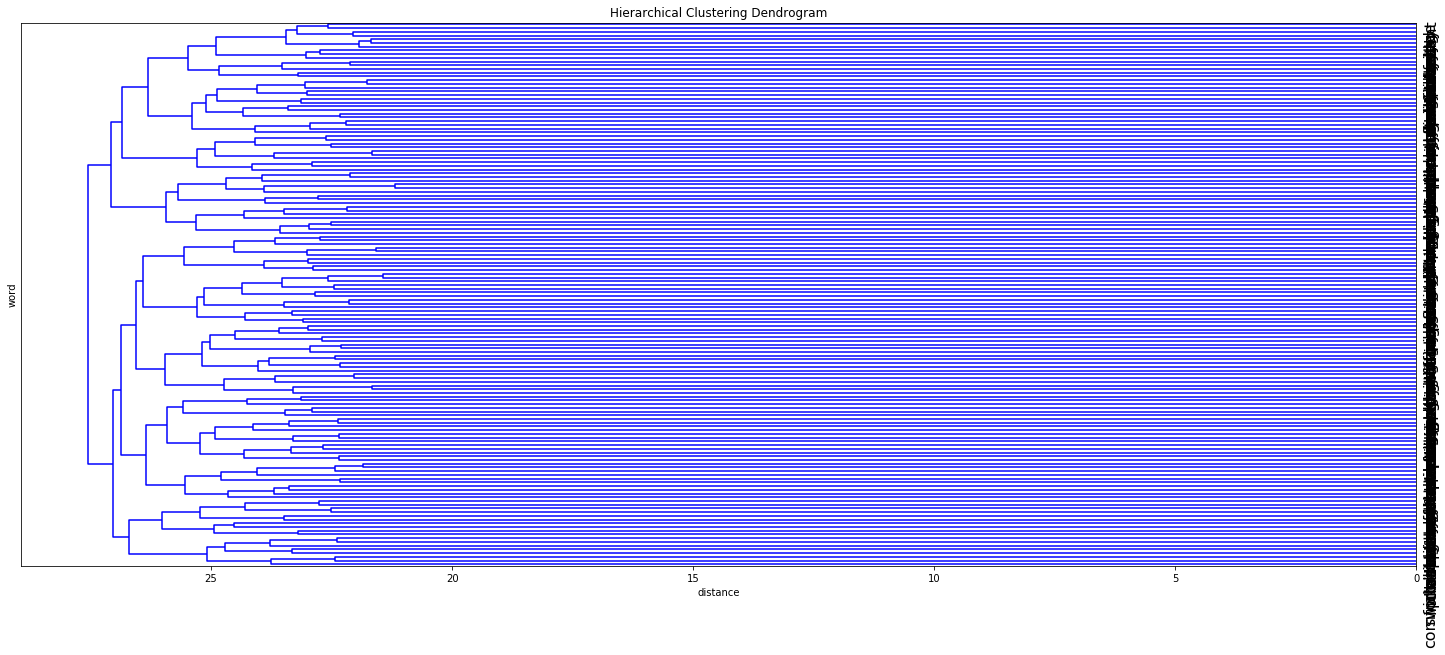

In [32]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(w2v_model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(w2v_model.wv.index2word[v])
)
plt.show()